# 数据分析实操模拟测试题06
---

**试题说明：**

- 测试时间：4小时
- 测试环境：juypter notebook
- 测试要求：所有操作命令或代码均在此notebook文件中编写，完整的Python程序可新建为扩展名为.py的文本文件，然后在本notebook中使用命令或者以引入模块的方式调用执行。程序运行结果必须在此notebook中输出，具体输出方法可见题目中的**操作说明**。


## 一、基础知识题

### 试题描述

文件 `house_price.csv` 记录了某市的房屋交易价格('Price')及相关信息。


### 题目要求

请使用**numpy、matplotlib、sklearn、scipy**编程完成以下操作。



#### 第1题（难易程度：* ，20分）

导入数据，绘制如图所示条形图。

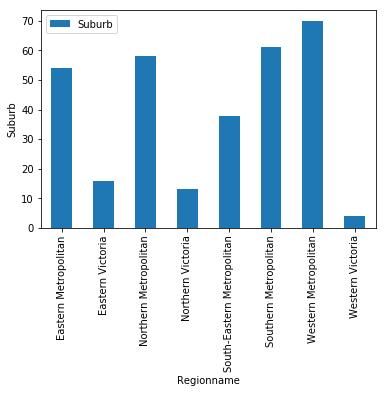

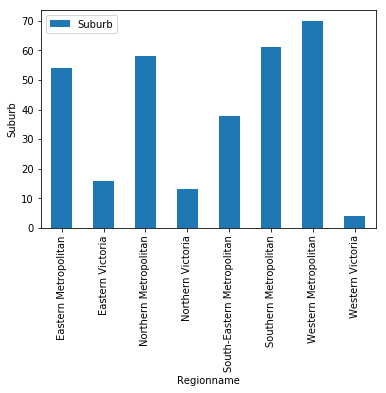

In [2]:
# 操作代码
import matplotlib.pyplot as plt
import pandas as pd
file_path = './house_price.csv'
df = pd.read_csv(file_path)
bar_df = df.groupby('Regionname').agg({'Suburb': pd.Series.nunique})
ax = bar_df.plot.bar()
_ = ax.set_ylabel('Suburb')

考查点: pandas, matplotlib, 柱状图。

#### 第2题（难易程度：* ，20分）

导入数据，绘制如图所示箱线图。

![image.png](attachment:image.png)

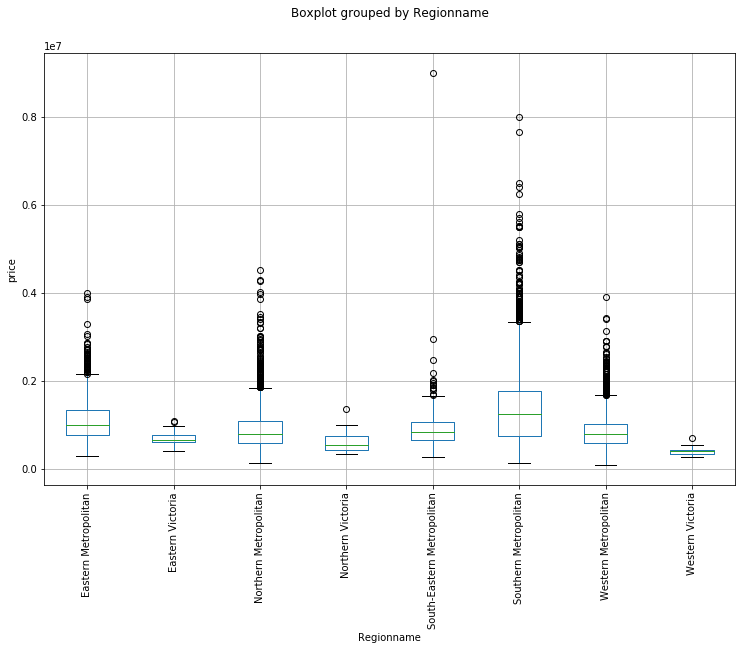

In [3]:
# 操作代码
import matplotlib.pyplot as plt
import pandas as pd
file_path = './house_price.csv'
df = pd.read_csv(file_path)
fig, ax = plt.subplots(figsize=(12,8))
ax = df.boxplot(column = 'Price', ax=ax, by = 'Regionname', rot=90);
_ = ax.set_title("")
_ = ax.set_ylabel('price')

考查点: pandas, matplotlib, 箱线图。

#### 第3题（难易程度：* ，20分）

导入数据，绘制如图所示箱线图。【注】本题**禁止使用pandas**工具包。

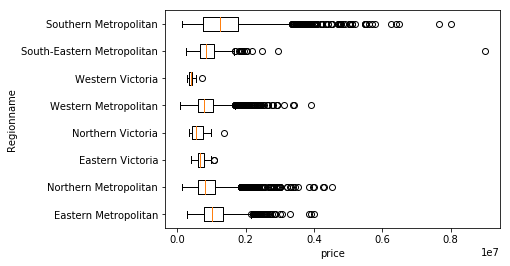

In [2]:
# 操作代码
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('house_price.csv', 
                     delimiter=',', names=True, 
                     dtype=None, encoding=None)

processed_data          = {'Regionname': set(data['Regionname'])}
processed_data['Price'] = [data['Price'][np.where(data['Regionname'] == rn)]
                              for rn in processed_data['Regionname']]

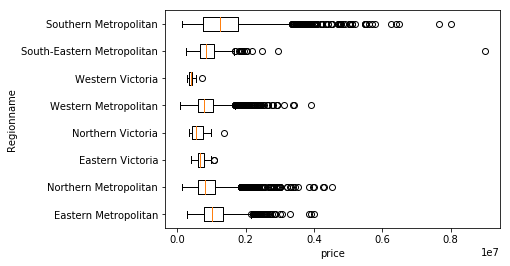

In [3]:
fig, ax = plt.subplots()
ax.boxplot(processed_data['Price'], labels=processed_data['Regionname'],vert=False)
_ = ax.set_xlabel('price')
_ = ax.set_ylabel('Regionname')
plt.show()

考查点: numpy, matplotlib, 箱线图。

## 二、综合题

### 试题描述

房屋交易价格分析（难易程度：*** ， 40分）

文件 `house_price.csv` 记录了某市的房屋交易价格('Price')及相关信息。


请编程完成以下数据分析任务：

### 题目要求

#### 第4题

请根据每个月的交易量绘制如图所示柱状图。

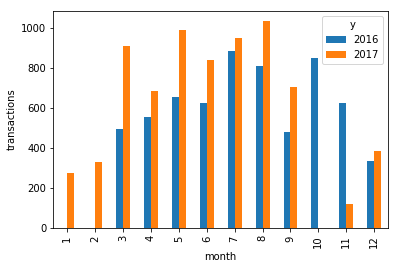

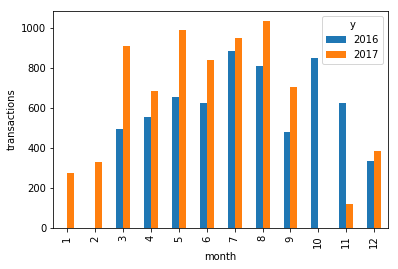

In [5]:
# 操作代码
import matplotlib.pyplot as plt
import pandas as pd
file_path = './house_price.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['Date'])
bar_df = pd.crosstab(df['date'].dt.month.rename('m'),df['date'].dt.year.rename('y'))
ax = bar_df.plot.bar()
_ = ax.set_xlabel('month')
_ = ax.set_ylabel('transactions')

考查点: numpy, matplotlib, 柱状图。

#### 第5题
选择合适的特征值，进行必要的数据处理，将数据集划分为训练集与测试集，根据训练集训练一个随机森林模型用于预测房屋交易价格('Price')。

In [4]:
# 操作代码
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

file_path = './house_price.csv'
df = pd.read_csv(file_path) 
df = df.dropna(axis=0)
y = df.Price
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = df[features]
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

model = RandomForestRegressor(n_estimators=10,random_state=1)
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

考查点: sklearn，随机森林。

#### 第6题
对上题中训练得到的模型进行评估，打印训练误差与测试误差。

In [8]:
# 操作代码
train_preds = model.predict(train_X)
print('训练误差: ', mean_absolute_error(train_y, train_preds))
test_preds = model.predict(test_X)
print('测试误差: ', mean_absolute_error(test_y, test_preds))

训练误差:  72060.5139516534
测试误差:  202888.18157951365


考查点: sklearn，随机森林，模型评估。